<a href="https://colab.research.google.com/github/sunandhini96/ERA_S11/blob/main/S11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/sunandhini96/MAIN_Repo.git"

In [ ]:
# Install Albumentation library
!pip install albumentations

In [ ]:
# Install LR finder
!pip install torch-lr-finder

In [ ]:
# Install GradCam
!pip install grad-cam

In [ ]:
!pip install torchsummary

In [ ]:
cd /content/MAIN_Repo

In [ ]:
from MAIN_Repo import *

In [ ]:
from models import resnet

In [ ]:
!python resnet.py

In [ ]:
cd /content/MAIN_Repo/

In [11]:
!python utils.py

In [12]:
!python main.py

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
==> Building model..


In [13]:
from torchvision import datasets
import torch
from utils import train_transform_function,test_transform_function
mean=(0.4914, 0.4822, 0.4465)
std=(0.2470, 0.2435, 0.2616)
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

train = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform_function(mean,std))
test = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform_function(mean,std))
dataloader_args = dict(shuffle=True, batch_size=512, num_workers=1, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


## Visualization of samples of data

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
==> Building model..


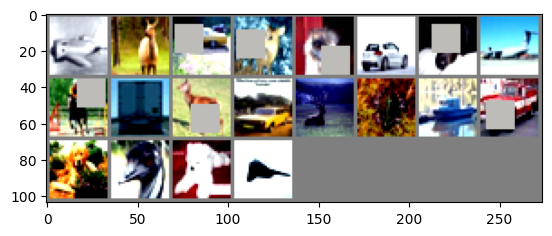

In [14]:
import torchvision
from main import imshow
import numpy as np
import matplotlib.pyplot as plt



# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import torchvision
# show images
imshow(torchvision.utils.make_grid(images[:20]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(20)))



In [15]:
from models.resnet import ResNet18
from utils import get_summary

get_summary(ResNet18(), (3, 32, 32))

plane deer  car   deer  bird  car   dog   plane horse truck deer  car   deer  frog  ship  truck dog   bird  dog   plane
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.26E-02


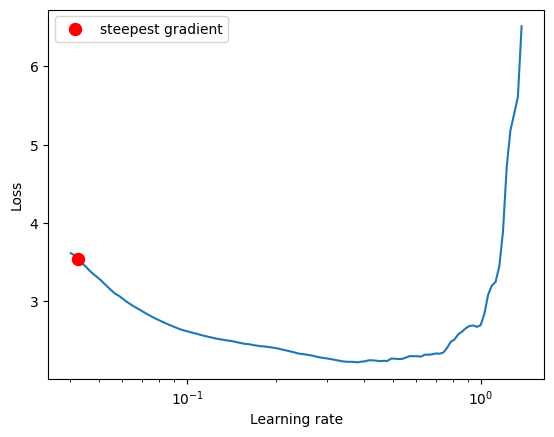

In [16]:
from torch_lr_finder import LRFinder
from main import fit_model
import torch.nn as nn
import torch.optim as optim
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.03, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [17]:
# from main import fit_model
# import torch.nn as nn
# import torch.optim as optim
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
# net=ResNet18().to(device)
# LEARNING_RATE = 0.03
# WEIGHT_DECAY = 1e-4
# NUM_EPOCHS=20
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=WEIGHT_DECAY)
# fit_model(net, optimizer, criterion, device, NUM_EPOCHS,train_loader, test_loader, use_l1=False, scheduler=None, save_best=False)

In [18]:
EPOCHS = 20

MAX_LR = 4.26E-02   # Suggested LR
#STEPS_PER_EPOCH = len(train_loader)

In [ ]:
from main import get_lr

In [21]:
from torch.optim.lr_scheduler import OneCycleLR
from main import train,test
EPOCHS = 20

scheduler = OneCycleLR(
        optimizer,
        max_lr=MAX_LR,
        steps_per_epoch=len(train_loader),
        epochs=EPOCHS,
        pct_start=5/EPOCHS,
        div_factor=100,
        three_phase=False,
        final_div_factor=100,
        anneal_strategy='linear'
    )

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, scheduler, criterion)
    test(model, device, test_loader, criterion)

EPOCH: 0


Loss=1.323206901550293 LR=0.0088780490797546 Batch_id=97 Accuracy=44.62: 100%|██████████| 98/98 [00:41<00:00,  2.33it/s]



Test set: Average loss: 0.0064, Accuracy: 2934/10000 (29.34%)

EPOCH: 1


Loss=1.0977216958999634 LR=0.0173300981595092 Batch_id=97 Accuracy=55.13: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.0030, Accuracy: 5289/10000 (52.89%)

EPOCH: 2


Loss=1.0748182535171509 LR=0.025782147239263798 Batch_id=97 Accuracy=62.41: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]



Test set: Average loss: 0.0032, Accuracy: 5163/10000 (51.63%)

EPOCH: 3


Loss=0.9508823156356812 LR=0.0342341963190184 Batch_id=97 Accuracy=66.32: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.0025, Accuracy: 5840/10000 (58.40%)

EPOCH: 4


Loss=1.027746558189392 LR=0.042571023306122446 Batch_id=97 Accuracy=66.85: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.0037, Accuracy: 4161/10000 (41.61%)

EPOCH: 5


Loss=0.8966213464736938 LR=0.03973130730612245 Batch_id=97 Accuracy=68.18: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]



Test set: Average loss: 0.0030, Accuracy: 5371/10000 (53.71%)

EPOCH: 6


Loss=0.9200765490531921 LR=0.03689159130612245 Batch_id=97 Accuracy=69.86: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]



Test set: Average loss: 0.0029, Accuracy: 5747/10000 (57.47%)

EPOCH: 7


Loss=0.857201099395752 LR=0.03405187530612245 Batch_id=97 Accuracy=70.86: 100%|██████████| 98/98 [00:41<00:00,  2.39it/s]



Test set: Average loss: 0.0024, Accuracy: 5947/10000 (59.47%)

EPOCH: 8


Loss=0.8627192378044128 LR=0.03121215930612245 Batch_id=97 Accuracy=72.79: 100%|██████████| 98/98 [00:41<00:00,  2.38it/s]



Test set: Average loss: 0.0022, Accuracy: 6230/10000 (62.30%)

EPOCH: 9


Loss=0.8284728527069092 LR=0.028372443306122447 Batch_id=97 Accuracy=73.25: 100%|██████████| 98/98 [00:40<00:00,  2.39it/s]



Test set: Average loss: 0.0016, Accuracy: 7312/10000 (73.12%)

EPOCH: 10


Loss=0.7379891276359558 LR=0.02553272730612245 Batch_id=97 Accuracy=74.69: 100%|██████████| 98/98 [00:40<00:00,  2.39it/s]



Test set: Average loss: 0.0040, Accuracy: 5363/10000 (53.63%)

EPOCH: 11


Loss=0.697508692741394 LR=0.02269301130612245 Batch_id=97 Accuracy=75.72: 100%|██████████| 98/98 [00:40<00:00,  2.39it/s]



Test set: Average loss: 0.0018, Accuracy: 7046/10000 (70.46%)

EPOCH: 12


Loss=0.7620857954025269 LR=0.019853295306122447 Batch_id=97 Accuracy=76.25: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]



Test set: Average loss: 0.0022, Accuracy: 6384/10000 (63.84%)

EPOCH: 13


Loss=0.5996698141098022 LR=0.017013579306122448 Batch_id=97 Accuracy=78.00: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]



Test set: Average loss: 0.0016, Accuracy: 7250/10000 (72.50%)

EPOCH: 14


Loss=0.5392720103263855 LR=0.014173863306122449 Batch_id=97 Accuracy=79.38: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]



Test set: Average loss: 0.0016, Accuracy: 7289/10000 (72.89%)

EPOCH: 15


Loss=0.5538424253463745 LR=0.01133414730612245 Batch_id=97 Accuracy=80.83: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]



Test set: Average loss: 0.0012, Accuracy: 8006/10000 (80.06%)

EPOCH: 16


Loss=0.6195296049118042 LR=0.00849443130612245 Batch_id=97 Accuracy=82.43: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]



Test set: Average loss: 0.0011, Accuracy: 8086/10000 (80.86%)

EPOCH: 17


Loss=0.544552206993103 LR=0.0056547153061224514 Batch_id=97 Accuracy=84.99: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]



Test set: Average loss: 0.0010, Accuracy: 8395/10000 (83.95%)

EPOCH: 18


Loss=0.3389090597629547 LR=0.0028149993061224524 Batch_id=97 Accuracy=87.38: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]



Test set: Average loss: 0.0008, Accuracy: 8605/10000 (86.05%)

EPOCH: 19


Loss=0.269216388463974 LR=-2.4716693877546714e-05 Batch_id=97 Accuracy=90.67: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]



Test set: Average loss: 0.0007, Accuracy: 8813/10000 (88.13%)



In [22]:
torch.cuda.is_available()

True

In [23]:
# torch.save(model.state_dict(), "model.pth")
# model.load_state_dict(torch.load("model.pth"), strict=False)

## Misclassified images

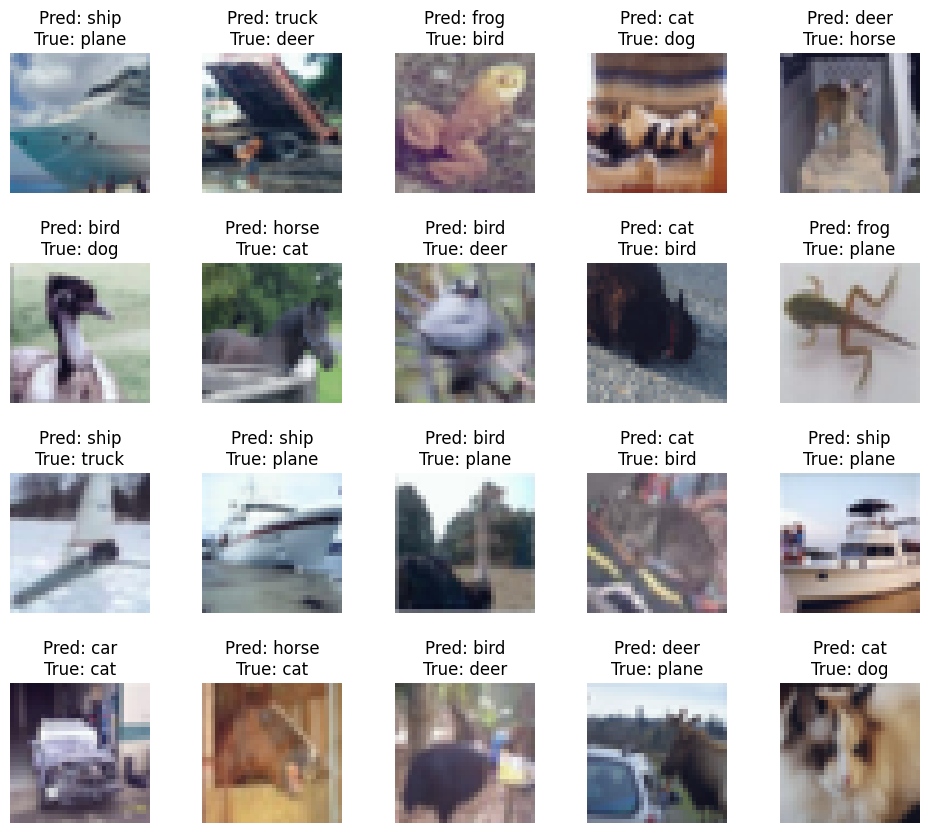

In [25]:
from utils import get_misclassified_data
from utils import display_cifar_misclassified_data
from torchvision import datasets, transforms
# Denormalize the data using test mean and std deviation
inv_normalize = transforms.Normalize(
    mean=[-0.50/0.23, -0.50/0.23, -0.50/0.23],
    std=[1/0.23, 1/0.23, 1/0.23]
)

# Get the misclassified data from test dataset
misclassified_data = get_misclassified_data(model, device, test_loader)

# Plot the misclassified data
display_cifar_misclassified_data(misclassified_data, classes, inv_normalize, number_of_samples=20)

## Grad cam images

## misclassified

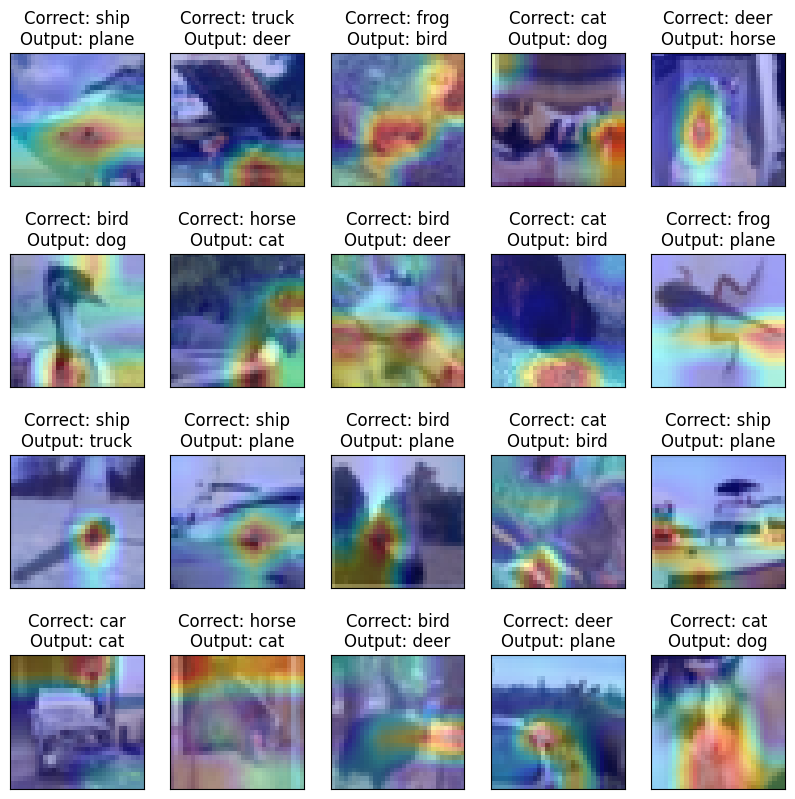

In [26]:
from utils import display_gradcam_output

target_layers = [model.layer4[-1]]
# targets = [ClassifierOutputTarget(7)]
targets = None

display_gradcam_output(misclassified_data, classes, inv_normalize, model, target_layers, targets, number_of_samples=20, transparency=0.70)

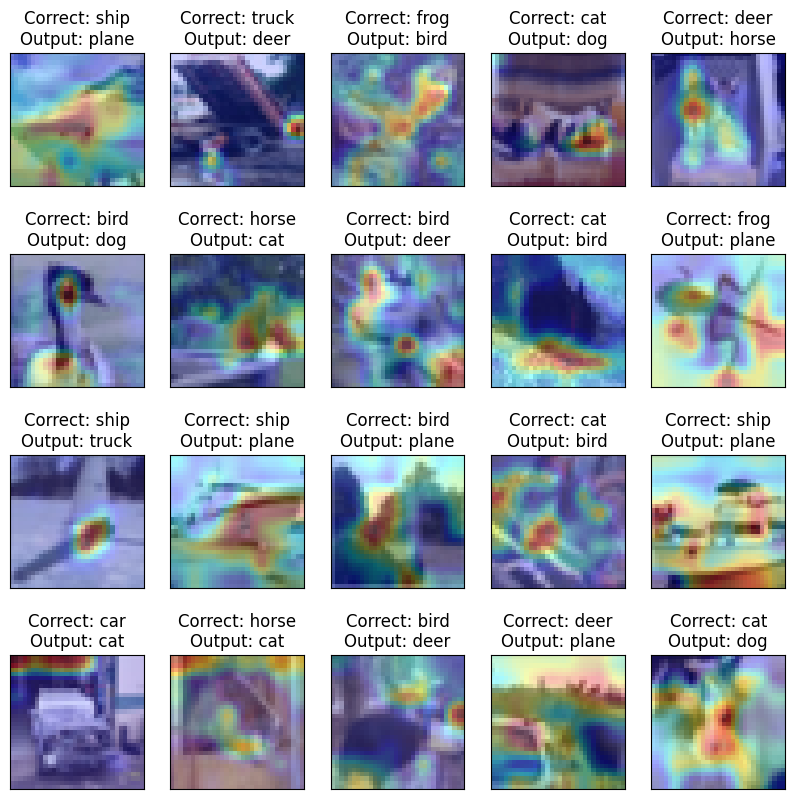

In [27]:
target_layers = [model.layer3[-2]]
display_gradcam_output(misclassified_data, classes, inv_normalize, model, target_layers, targets, number_of_samples=20, transparency=0.70)

## classified

In [ ]:
from utils import get_classified_data

In [31]:
classified_data = get_classified_data(model, device, test_loader)

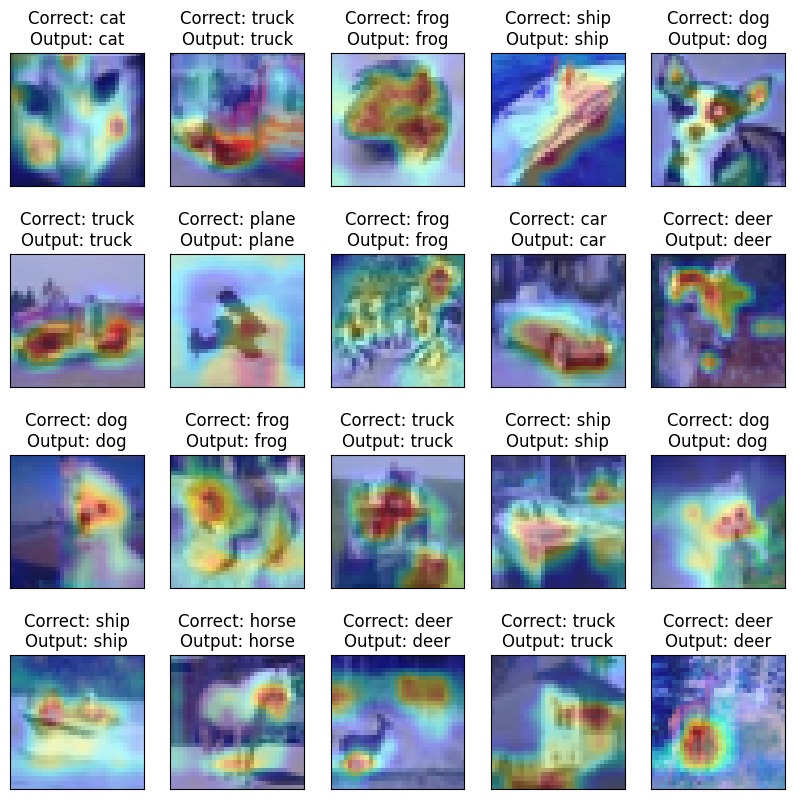

In [32]:
target_layers = [model.layer3[-2]]
display_gradcam_output(classified_data, classes, inv_normalize, model, target_layers, targets, number_of_samples=20, transparency=0.70)